<a href="https://colab.research.google.com/github/Celine96/AIFFEL_Projects_Lists/blob/main/%5BEX18%5D%EB%8B%A4%EC%96%91%ED%95%9C_OCR%EB%AA%A8%EB%8D%B8_%EB%B9%84%EA%B5%90%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 다양한 OCR모델 비교하기
OCR 기능을 활용한 서비스를 빠르게 개발해야 하는 임무를 맡은 엔지니어가 되어, 어떤 모듈을 도입하면 좋을지 기술검증을 하는 역할을 맡게 되었다고 가정.

## Step1. 검증용 데이터셋 준비
### OCR에 영향을 주는 요인 
- 텍스트의 모양과 크기
- 배치
- 노이즈

## Step2. keras-ocr, Tesseract로 테스트 진행

In [3]:
!pip install keras-ocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 KB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 50.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.2/619.2 KB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 6.0 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19581 sha256=00f6da5c738f54507fe9dd2e8fc96a5010dd7adb91773d457846b776f364d5c9
  Stored in directory: /root/.cache/pip/wheels/19/09/72/3eb74d236bb48bd0f3c6c3c83e4e0c5bbfcbcad7c6c3539db8
Successfully built validators


In [4]:
import matplotlib.pyplot as plt
import keras_ocr


# 인식을 위한 파이프라인을 생성하는데 이때 초기화 과정에서 미리 학습된 모델의 가중치(weight)를 불러온다.
# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드함
# 구체적으로 detector 검출기와 recognizer 인식기를 위한 가중치 하나씩을 불러온다. 

pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [5]:
# 테스트에 사용할 이미지 url을 모아 봅니다. 추가로 더 모아볼 수도 있습니다. 
image_urls = [
  'https://source.unsplash.com/M7mu6jXlcns/640x460',
  'https://source.unsplash.com/6jsp4iHc8hI/640x460',
  'https://source.unsplash.com/98uYQ-KupiE',
  'https://source.unsplash.com/j9JoYpaJH3A',
  'https://source.unsplash.com/eBkEJ9cH5b4'
]

# 만들어둔 파이프라인의 recognize() 에 이미지를 넣기 
images = [ keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]

1/1 [==============================] - 1s 1s/step


TypeError: ignored

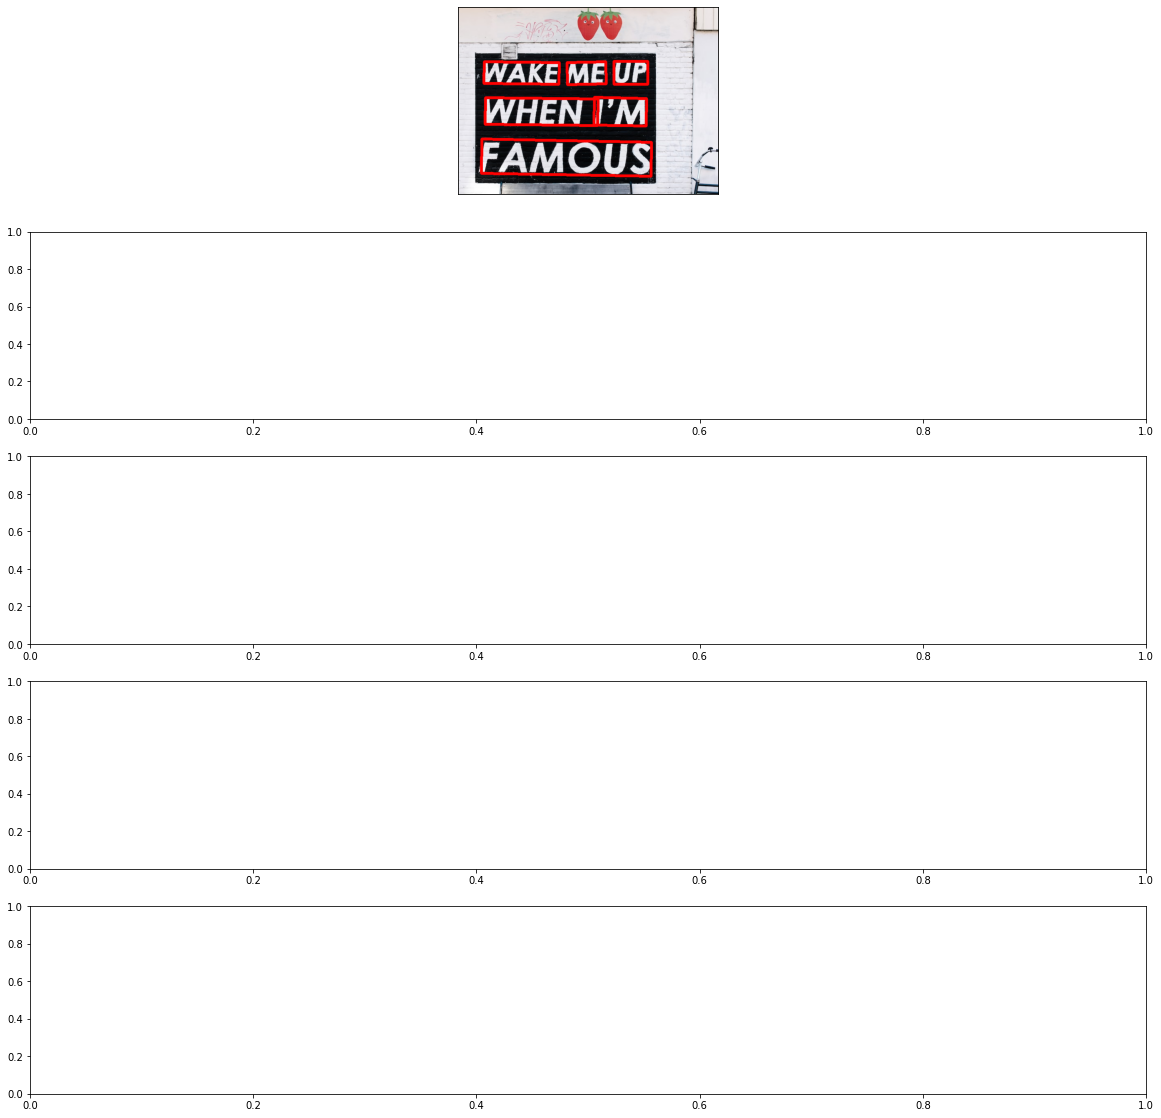

In [12]:
#pyplot으로 시각화
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx],predictions=prediction_groups[idx][0], ax=ax)

### 15-8 테서랙트 써보기 
- 테서랙트(Tesseract) 라이브러리로 이미지에서 문자를 인식하기
- OCR 오픈소스 라이브러리

1) 테서랙트 설치
```
$ sudo apt install tesseract-ocr
$ sudo apt install libtesseract-dev
```
2) 테서랙트 파이썬 wrapper 설치하기
- `Pytesseract`는 OS에 설치된 테서랙트를 파이썬에서 쉽게 사용할 수 있도록 해주는 래퍼 라이브러리(wrapper library)

3) text detection - 이미지내의 문자 검출&인식 하기

In [14]:
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 25.7 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2


In [17]:
import os 
print(os.getcwd())
print(os.path.realpath('test_image_movie.png'))

/content
/content/test_image_movie.png


In [22]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

Image.open('/content/drive/MyDrive/aiffel/test_image_movie.PNG')

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path, output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

# /content/drive/MyDrive/aiffel/test_image_movie.PNG
work_dir = '/content/drive/MyDrive/aiffel'
img_file_path = work_dir + '/test_image_movie.png' 
Image.open('/content/drive/MyDrive/aiffel/test_image_movie.PNG')


cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

UnidentifiedImageError: ignored

In [23]:
#이미지를 파일에서 읽어오기
from PIL import Image

Image.open('/content/drive/MyDrive/aiffel/test_image_movie.PNG')


UnidentifiedImageError: ignored

Step3. 테스트 결과 정리


Step4. 결과 분석과 결론 제시

### steup5. 회고
다음문제가 해결되지 않아 우선 제출하고 다시 진행해야할듯 하다.. 

`[EX18 OCR 질문 - 이미지 경로] 선생님들,,, 저 좀 도와주셔요.....ㅠㅜㅠㅜ
import os 이용해서 이미지 경로 확인해서 pytesseract crop_word_region함수에 인자로 넣었는데 자꾸만 존재하지 않는 directory라고 나와서 진행이 안되네요.... 

이전에 이미지 open했던 기억이 떠올라서 로컬 콜랩으로 PIL Image 로 이미지 open했더니 열리는데 같은 경로 이용해서 인자로 사용하면 위에 언급한 문제 계속되고 

심지어  pytesseract  설치도 에러... (PIL IMAGE 라이브러리와 pytesseract간에 충돌이 있는건지) 

어떻게 해결하면 좋을까욤... 😭 (수정됨)`

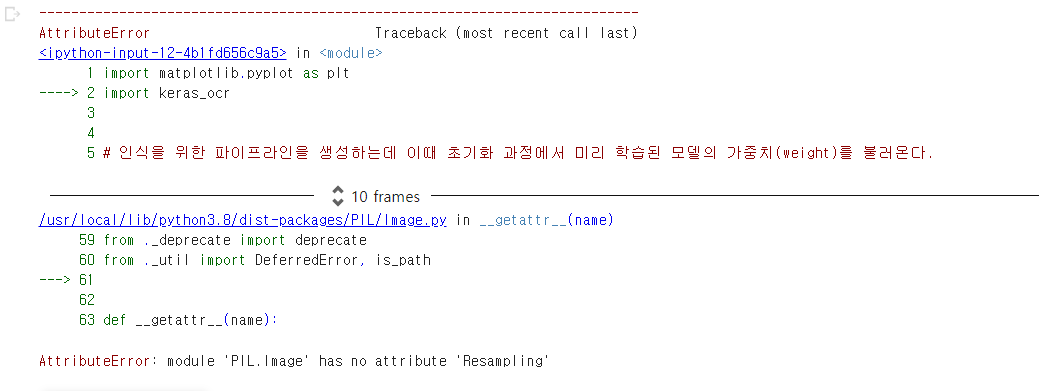